In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

#Missing Value
import missingno

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/BankChurners.csv")
# Drop last 2 column, cause this not give any information. this feature is results from previous research
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CLIENTNUM,int64,0,0.0,10127,"[716497908, 770952933]"
1,Attrition_Flag,object,0,0.0,2,"[Attrited Customer, Existing Customer]"
2,Customer_Age,int64,0,0.0,45,"[66, 39]"
3,Gender,object,0,0.0,2,"[M, F]"
4,Dependent_count,int64,0,0.0,6,"[3, 5]"
5,Education_Level,object,0,0.0,7,"[Doctorate, Uneducated]"
6,Marital_Status,object,0,0.0,4,"[Divorced, Married]"
7,Income_Category,object,0,0.0,6,"[Less than $40K, $80K - $120K]"
8,Card_Category,object,0,0.0,4,"[Platinum, Blue]"
9,Months_on_book,int64,0,0.0,44,"[20, 43]"


In [ ]:
#checking for duplicates

df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [ ]:
cor = df.corr()
cor

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


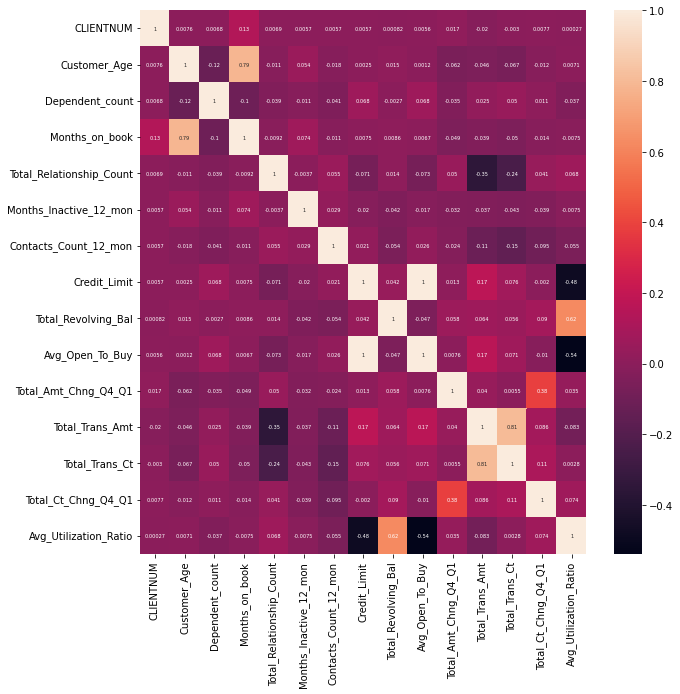

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data = cor, annot = True, cmap = "rocket", annot_kws = {
                'fontsize' : 5});

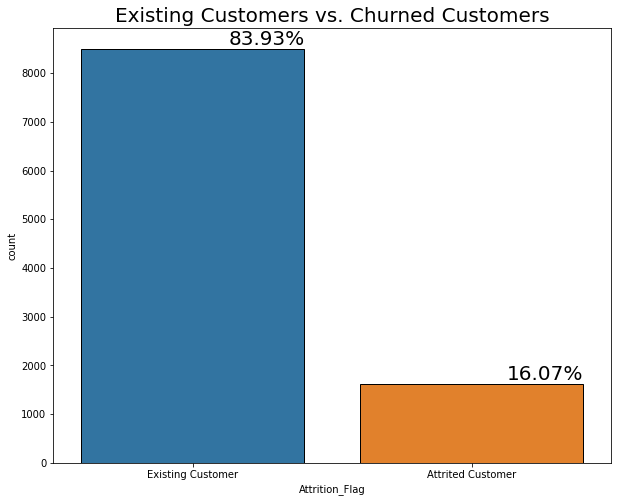

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Attrition_Flag"], edgecolor = 'black')
plt.title('Existing Customers vs. Churned Customers', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 1.jpg')
plt.show()

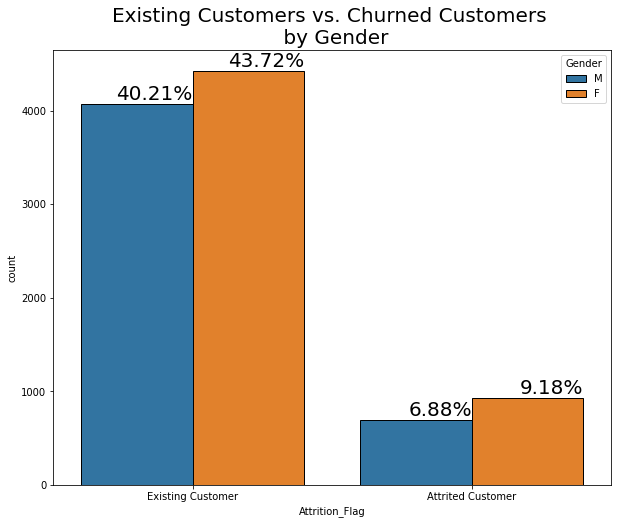

In [ ]:
#encoding categorical features
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Attrition_Flag"], hue=df["Gender"], edgecolor = 'black')
plt.title('Existing Customers vs. Churned Customers \n by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 2.jpg')
plt.show()

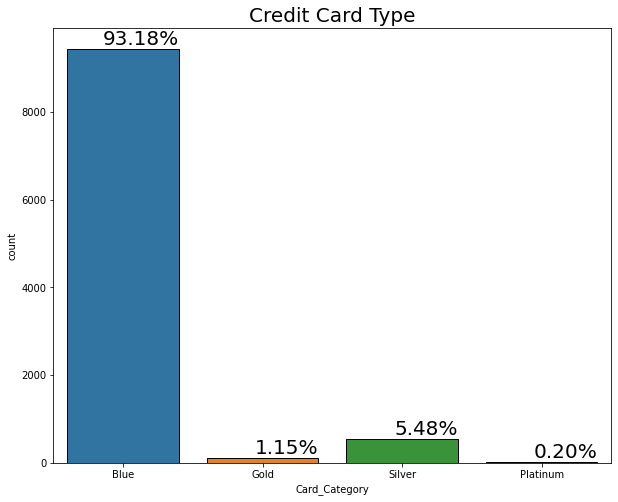

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Card_Category"], edgecolor = 'black')
plt.title('Credit Card Type', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 3.jpg')
plt.show()


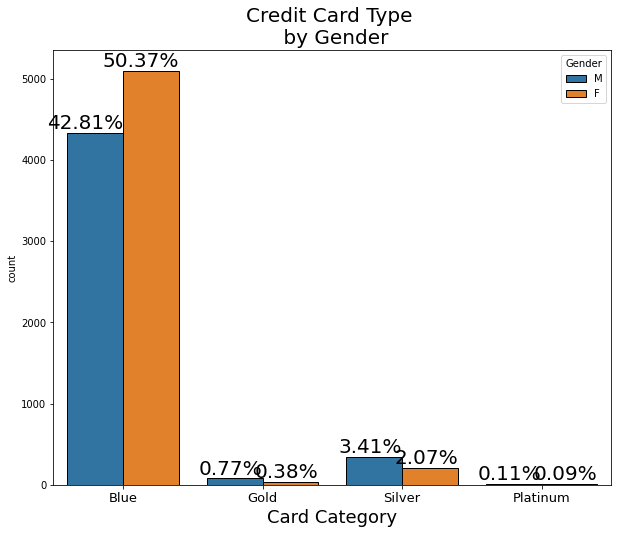

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Card_Category"], hue=df["Gender"], edgecolor = 'black')
plt.title('Credit Card Type \n by Gender', fontsize=20)
plt.xlabel('Card Category', fontsize=18)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 4.jpg')
plt.show()

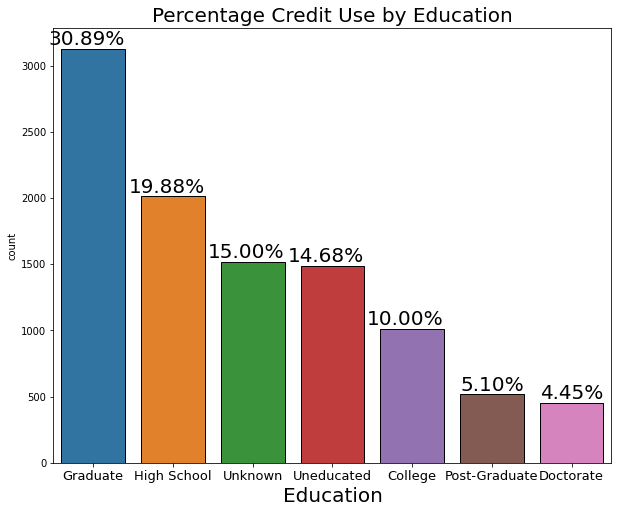

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Education_Level"], edgecolor = 'black', order = df["Education_Level"].value_counts().index)
plt.title('Percentage Credit Use by Education', fontsize=20)
plt.xlabel('Education', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 5.jpg')
plt.show()

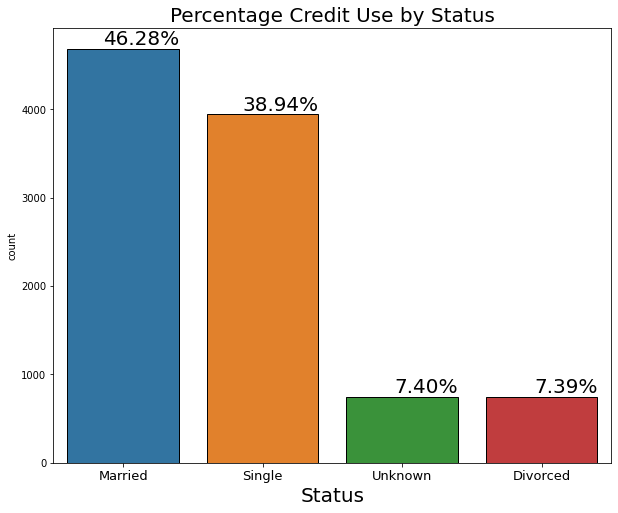

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Marital_Status"], edgecolor = 'black', order = df["Marital_Status"].value_counts().index)
plt.title('Percentage Credit Use by Status', fontsize=20)
plt.xlabel('Status', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 6.jpg')
plt.show()


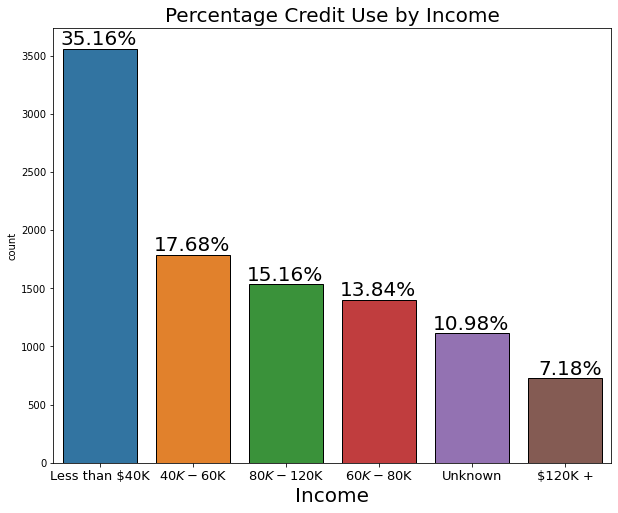

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Income_Category"], edgecolor = 'black', order = df["Income_Category"].value_counts().index)
plt.title('Percentage Credit Use by Income', fontsize=20)
plt.xlabel('Income', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 7.jpg')
plt.show()

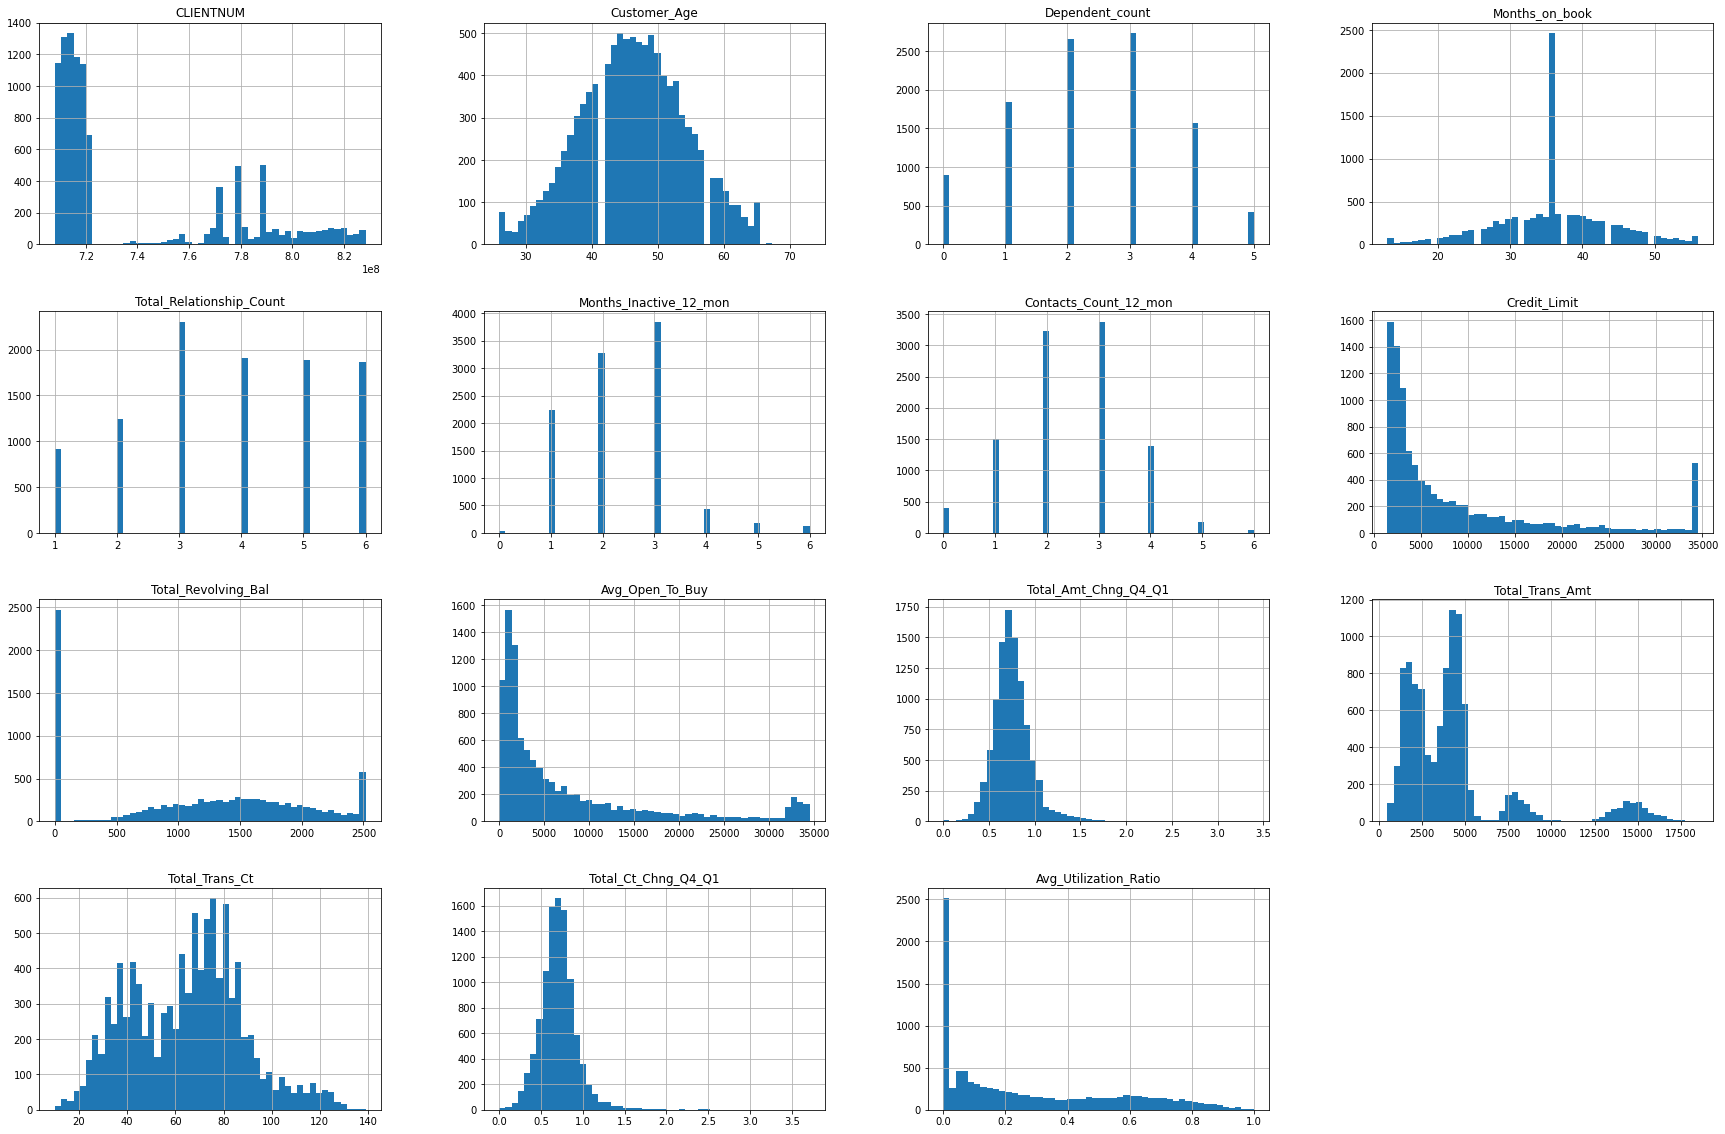

In [ ]:
# Distribution plot to visualize data distribution
df.hist(bins=50,figsize=(30,20))
plt.savefig('Data Preprocessing 1 - Distribution Plot.jpg')
plt.show()

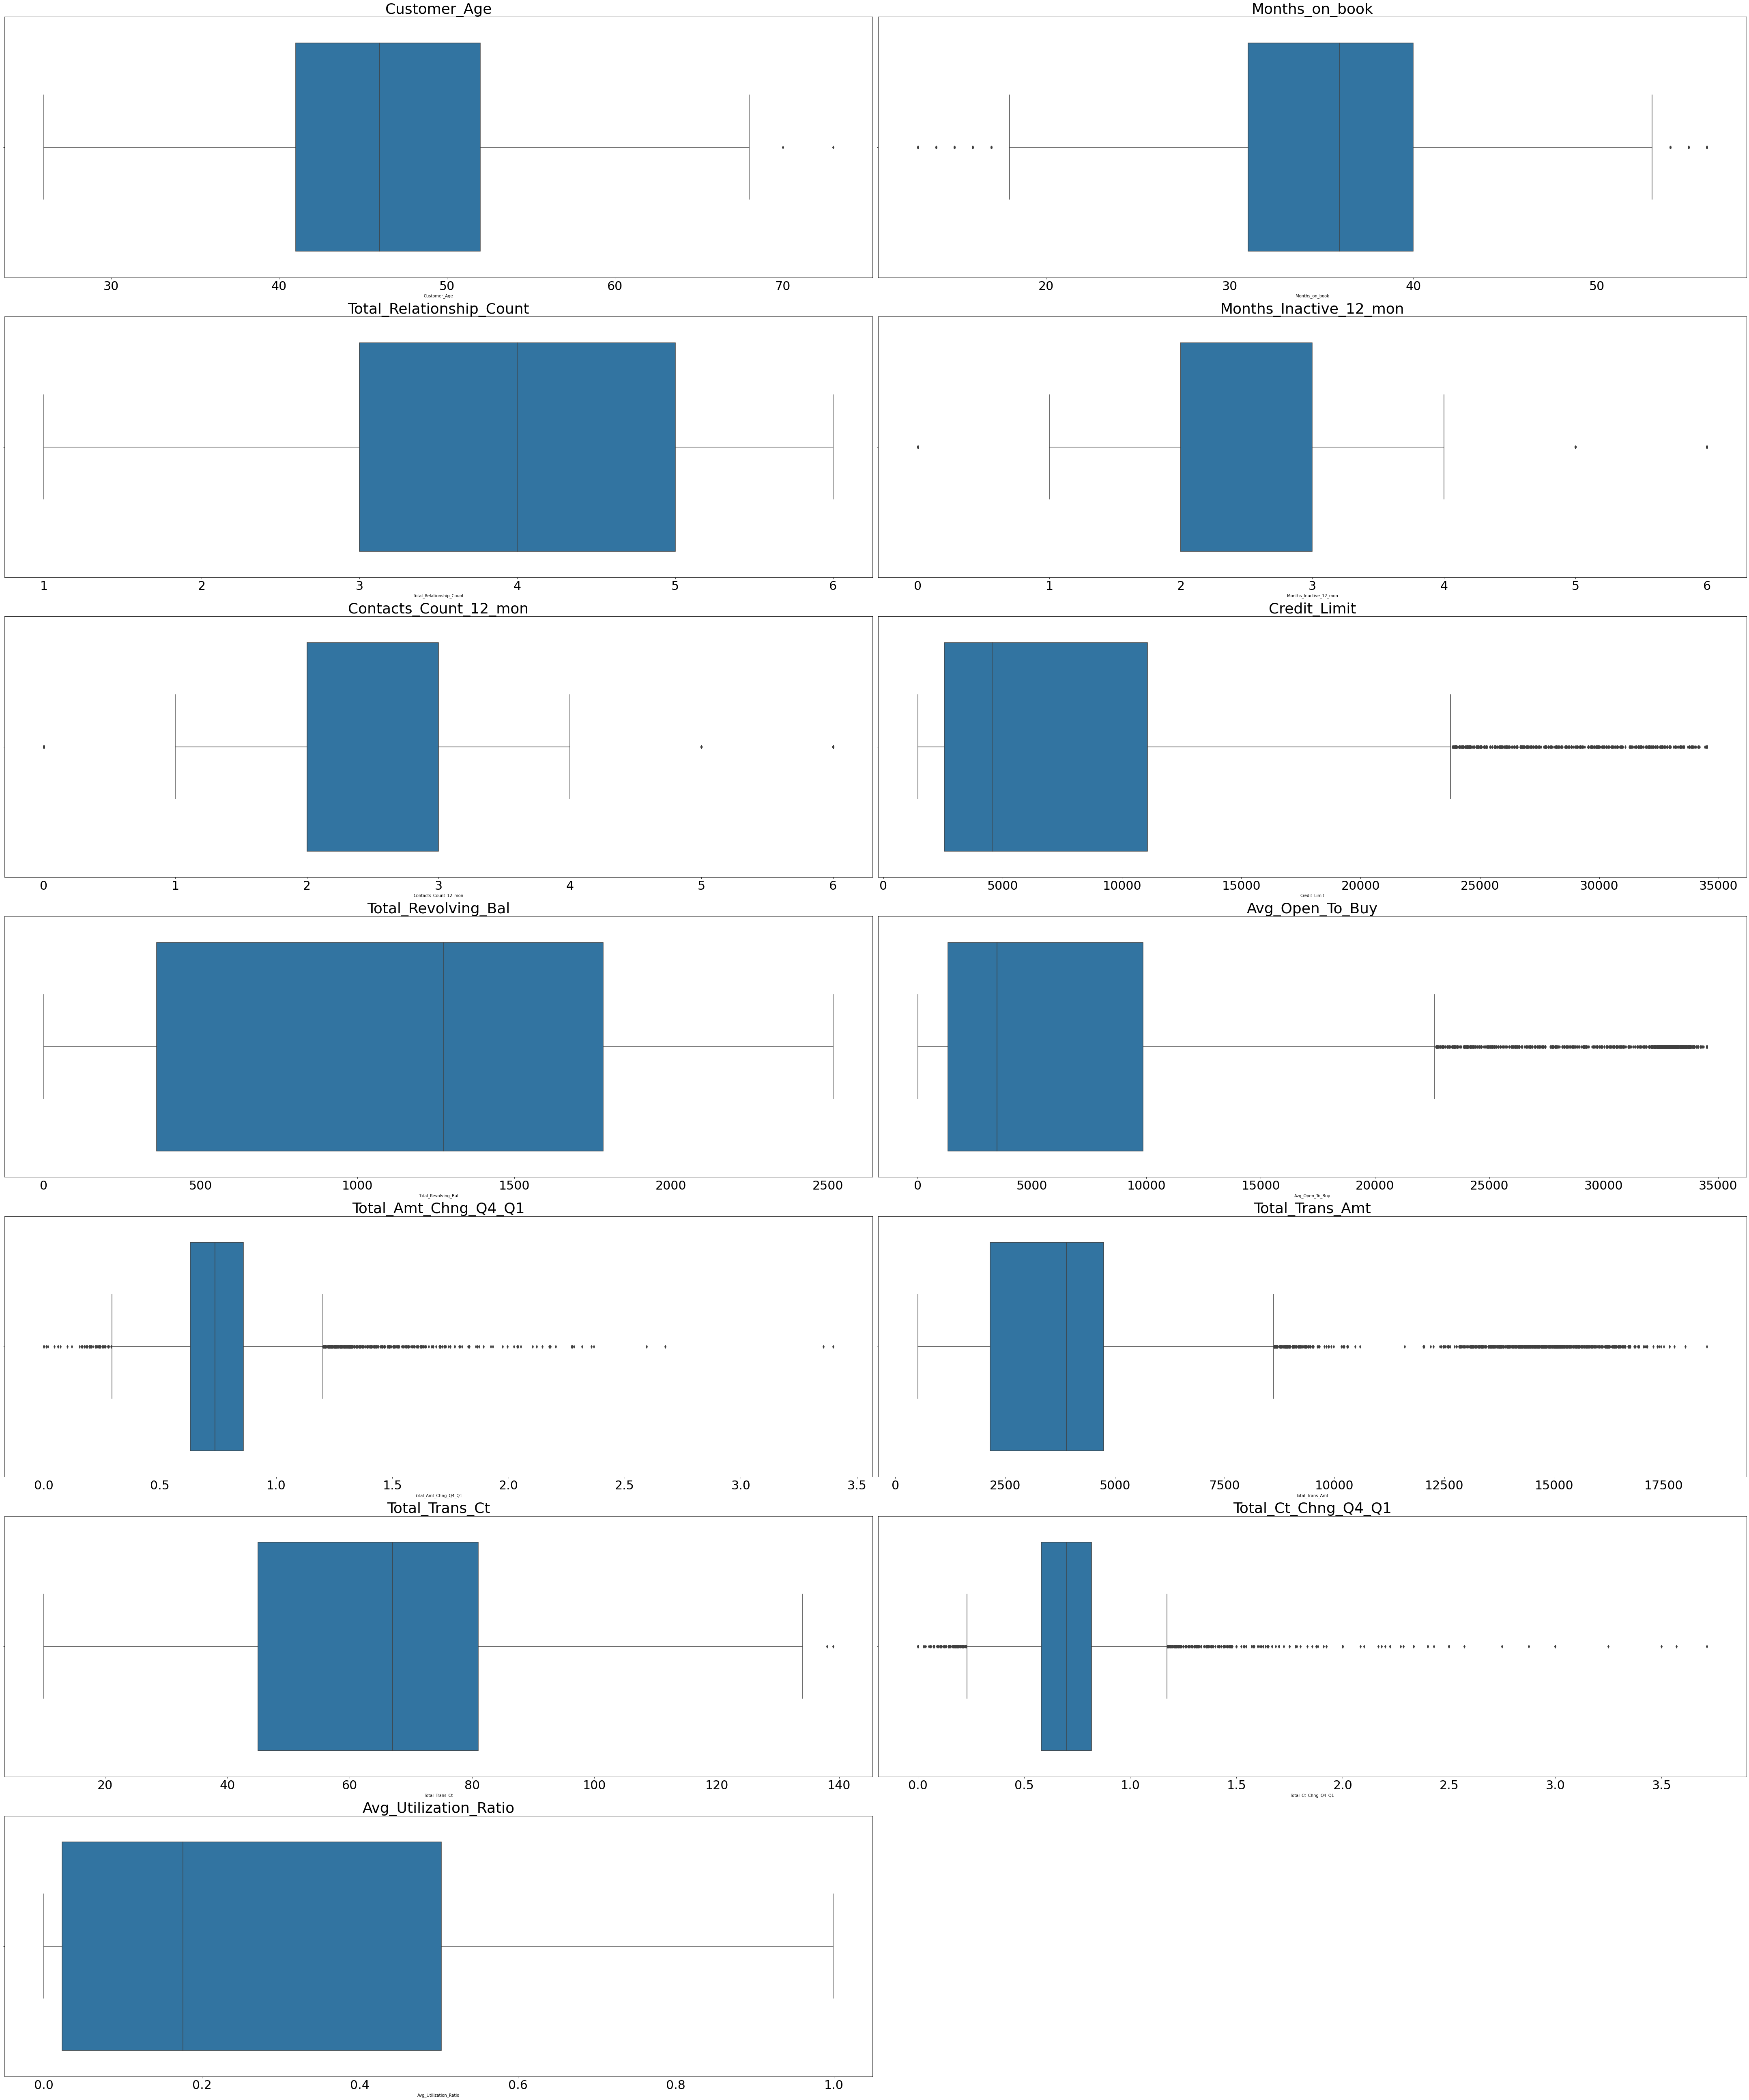

In [ ]:
# plot for outliers detection
num_feat = df.drop(["CLIENTNUM",
                    "Attrition_Flag",
                    "Gender",
                    "Dependent_count",
                    "Education_Level",
                    "Marital_Status",
                    "Income_Category",
                    "Card_Category"],
                   axis = 1)

plt.figure(figsize=(60,72))
for i in range(len(num_feat.columns)):
    plt.subplot(7,2,i+1)
    sns.boxplot(num_feat[num_feat.columns[i]])
    plt.title(num_feat.columns[i], fontsize = 36)
    plt.xticks(fontsize = 30)
    
plt.tight_layout()
plt.savefig('Data Preprocessing 2 - Box Plot Check Outlier.jpg')
plt.show()

In [ ]:
# creating function to generate IQR, lower limit, and Upper limit

def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.50)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    if Lower_Limit < 0 :
        Lower_Limit = 0
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'median: {q2}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [ ]:
# check IQR, upper limit, and lower limit for each feature

for i in num_feat :
    find_outlier(num_feat, i)


Outlier Customer_Age
IQR: 11.0
Lower_Limit: 24.5
median: 46.0
Upper_Limit: 68.5
_________________________
Outlier Months_on_book
IQR: 9.0
Lower_Limit: 17.5
median: 36.0
Upper_Limit: 53.5
_________________________
Outlier Total_Relationship_Count
IQR: 2.0
Lower_Limit: 0.0
median: 4.0
Upper_Limit: 8.0
_________________________
Outlier Months_Inactive_12_mon
IQR: 1.0
Lower_Limit: 0.5
median: 2.0
Upper_Limit: 4.5
_________________________
Outlier Contacts_Count_12_mon
IQR: 1.0
Lower_Limit: 0.5
median: 2.0
Upper_Limit: 4.5
_________________________
Outlier Credit_Limit
IQR: 8512.5
Lower_Limit: 0
median: 4549.0
Upper_Limit: 23836.25
_________________________
Outlier Total_Revolving_Bal
IQR: 1425.0
Lower_Limit: 0
median: 1276.0
Upper_Limit: 3921.5
_________________________
Outlier Avg_Open_To_Buy
IQR: 8534.5
Lower_Limit: 0
median: 3474.0
Upper_Limit: 22660.75
_________________________
Outlier Total_Amt_Chng_Q4_Q1
IQR: 0.22799999999999998
Lower_Limit: 0.28900000000000003
median: 0.736
Upper_Li

In [ ]:
# creating outliers columns
out1 = df[(df['Customer_Age'] > 68.5) | (df['Customer_Age'] < 24.5)]
out2 = df[(df['Months_on_book'] > 53.5) | (df['Months_on_book'] < 17.5)]
out3 = df[(df['Total_Relationship_Count'] > 8.0) | (df['Total_Relationship_Count'] < 0)]
out4 = df[(df['Months_Inactive_12_mon'] > 4.5) | (df['Months_Inactive_12_mon'] < 0.5)]
out5 = df[(df['Contacts_Count_12_mon'] > 4.5) | (df['Contacts_Count_12_mon'] < 0.5)]
out6 = df[(df['Credit_Limit'] > 23836.25) | (df['Credit_Limit'] < 0)]
out7 = df[(df['Total_Revolving_Bal'] > 3921.5) | (df['Total_Revolving_Bal'] < 0)]
out8 = df[(df['Avg_Open_To_Buy'] > 22660.75) | (df['Avg_Open_To_Buy'] < 0)]
out9 = df[(df['Total_Amt_Chng_Q4_Q1'] > 1.201) | (df['Total_Amt_Chng_Q4_Q1'] < 0.28900000000000003)]
out10 = df[(df['Total_Trans_Amt'] > 8619.25) | (df['Total_Trans_Amt'] < 0)]
out11 = df[(df['Total_Trans_Ct'] > 135.0) | (df['Total_Trans_Ct'] < 0)]
out12 = df[(df['Total_Ct_Chng_Q4_Q1'] > 1.172) | (df['Total_Ct_Chng_Q4_Q1'] < 0.22799999999999998)]
out13 = df[(df['Avg_Utilization_Ratio'] > 1.2229999999999999) | (df['Avg_Utilization_Ratio'] < 0)]

In [ ]:
# creating outliers dataframe
out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8, out9, out10, out11, out12, out13], axis = 0)
out_all.drop_duplicates(inplace=True)
print(out_all)

      CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
251   715952883  Existing Customer            73      M                0   
254   787348608  Existing Customer            70      M                0   
11    710821833  Existing Customer            65      M                1   
18    806160108  Existing Customer            61      M                1   
27    804424383  Existing Customer            63      M                1   
...         ...                ...           ...    ...              ...   
8399  711272058  Existing Customer            40      F                4   
8510  823629333  Existing Customer            42      M                4   
8526  771045708  Attrited Customer            41      F                5   
8535  710937783  Existing Customer            53      F                0   
9388  714361083  Attrited Customer            40      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
251      High Scho

In [ ]:
#check outliers percentage

print('Percentage Outlier')
len(out_all)/len(df)*100

Percentage Outlier


32.84289523057174

In [ ]:
#check whether there is any duplicate value
pd.DataFrame({'Duplicated Data' : df[df.duplicated()].sum()})

,Duplicated Data
CLIENTNUM,0.0
Attrition_Flag,0.0
Customer_Age,0.0
Gender,0.0
Dependent_count,0.0
Education_Level,0.0
Marital_Status,0.0
Income_Category,0.0
Card_Category,0.0
Months_on_book,0.0


In [ ]:
# check missing value
miss = pd.DataFrame({'Missing Value' : df.isna().sum()})
miss[miss['Missing Value'] > 0 ]

,Missing Value


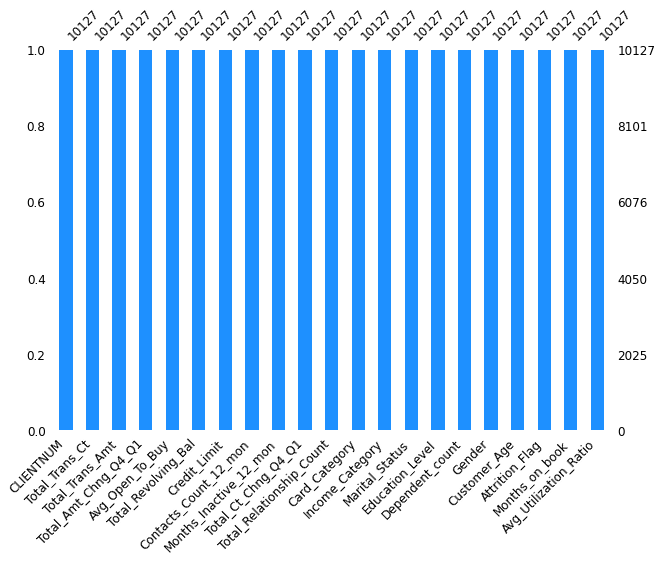

In [ ]:
# plot to visualize the missing value proportion
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,7), fontsize=12)
plt.savefig('Data Preprocessing 3 - Check Missing Value.jpg')
plt.show()

In [ ]:
# Import library for Modeling and Evaluatiom

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [ ]:
df_raw = df.copy()
df_raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Ordinal Variable
Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4,
    'Unknown'        : 5
}

Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
}

Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
}

df.loc[:, 'Income_Category'] = df['Income_Category'].map(Income_Category_map)
df.loc[:, 'Card_Category'] = df['Card_Category'].map(Card_Category_map)
df.loc[:, 'Education_Level'] = df['Education_Level'].map(Education_Level_map)

# Nominal Variable

Gender_map = {
    'M' : 0,
    'F' : 1
}

Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

Marital_Status_map = {
    'Single' : 0,
    'Married' : 1,
    'Divorced' : 2,
    'Unknown' : 3
}


df.loc[:, 'Gender'] = df['Gender'].map(Gender_map)
df['Dependent_count'].astype(int)
df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
df.loc[:, 'Marital_Status'] = df['Marital_Status'].map(Marital_Status_map)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,3,0,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,1,3,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y,
                                    test_size = 0.3, 
                                    random_state = 2022)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [ ]:
st_scaler = StandardScaler()
rb_scaler = RobustScaler()

transformer = ColumnTransformer([
                ('standard scaler', st_scaler, ['Customer_Age', 'Months_on_book', 'Total_Revolving_Bal', 
                                             'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct']),
                ('robust scaler', rb_scaler, ['Credit_Limit', 'Avg_Open_To_Buy', 
                                             'Total_Trans_Amt', 'Avg_Utilization_Ratio'])
], remainder = "passthrough")

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard scaler', StandardScaler(),
                                 ['Customer_Age', 'Months_on_book',
                                  'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
                                  'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct']),
                                ('robust scaler', RobustScaler(),
                                 ['Credit_Limit', 'Avg_Open_To_Buy',
                                  'Total_Trans_Amt',
                                  'Avg_Utilization_Ratio'])])

In [ ]:
logreg = LogisticRegression(random_state = 2022)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 2022)
rf = RandomForestClassifier(random_state = 2022)



In [ ]:
list_model = {'Logistic Regression' : logreg, 'KNN' : knn, 'Decision Tree' : dt, 'Random Forest' : rf}

In [ ]:
models_list = [logreg, knn, dt, rf]

In [ ]:
f1_score = []
mean_f1_score = []
std_f1_score = []
crossval = StratifiedKFold(n_splits=5)
def model_eval_f1_score(model):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = 'f1', error_score='raise')
        f1_score.append(model_cv)
        mean_f1_score.append(model_cv.mean())
        std_f1_score.append(model_cv.std())

In [ ]:
roc_auc = []
mean_roc_auc = []
std_roc_auc = []
crossval = StratifiedKFold(n_splits=5)
def model_eval_roc_auc(model):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = 'roc_auc', error_score='raise')
        roc_auc.append(model_cv)
        mean_roc_auc.append(model_cv.mean())
        std_roc_auc.append(model_cv.std())

In [ ]:
model_eval_f1_score(list_model)

In [ ]:
model_eval_roc_auc(list_model)

In [ ]:
model_b_tuning = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'f1_Score' : f1_score,
    'f1_Score_Mean': mean_f1_score,
    'f1_Score_Std': std_f1_score,
    'roc_auc' : roc_auc,
    'roc_auc_Mean': mean_roc_auc,
    'roc_auc_Std': std_roc_auc
})

model_b_tuning

,model,f1_Score,f1_Score_Mean,f1_Score_Std,roc_auc,roc_auc_Mean,roc_auc_Std
0,Logistic Regression,"[0.6649616368286445, 0.670076726342711, 0.6475...",0.644201,0.026236,"[0.9393774508884177, 0.9125954556541644, 0.921...",0.921480,0.011112
1,KNN,"[0.6353591160220994, 0.6324786324786326, 0.576...",0.613972,0.032480,"[0.8919001069478583, 0.8935568606112915, 0.887...",0.886052,0.009502
2,Decision Tree,"[0.8269662921348314, 0.75, 0.7699115044247788,...",0.795195,0.031366,"[0.8966564722217012, 0.8389290203951443, 0.867...",0.875808,0.023121
3,Random Forest,"[0.8909512761020882, 0.8316831683168316, 0.831...",0.858483,0.025571,"[0.9881925811959398, 0.981179053230013, 0.9820...",0.985179,0.003017


In [ ]:
data=pd.read_csv("/content/BankChurners.csv")
data=data.iloc[:,:-2]
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
from sklearn.model_selection import train_test_split
X=data.drop("Attrition_Flag",axis=1)
y=data.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [ ]:
X_train_num=X_train[X_train.select_dtypes(['int64',"float64"]).columns]
X_test_num=X_test[X_test.select_dtypes(['int64',"float64"]).columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_scaled=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [ ]:
X_train_dum=pd.get_dummies(X_train[X_train.select_dtypes(['category']).columns],drop_first=True)
X_test_dum=pd.get_dummies(X_test[X_test.select_dtypes(['category']).columns],drop_first=True)

In [ ]:
X_train_pd=pd.concat([X_train_scaled, X_train_dum], axis=1)
X_test_pd=pd.concat([X_test_scaled, X_test_dum], axis=1)

In [ ]:
X_train_pd.drop("CLIENTNUM",axis=1,inplace=True)
X_test_pd.drop("CLIENTNUM",axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_pd,y_train)
lrpredictions = logmodel.predict(X_test_pd)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lrpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.53      0.64       654
Existing Customer       0.92      0.97      0.94      3397

         accuracy                           0.90      4051
        macro avg       0.86      0.75      0.79      4051
     weighted avg       0.90      0.90      0.89      4051



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train_pd,y_train)
knnpredictions=knnmodel.predict(X_test_pd)
print(classification_report(y_test,knnpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.54      0.29      0.38       654
Existing Customer       0.88      0.95      0.91      3397

         accuracy                           0.85      4051
        macro avg       0.71      0.62      0.65      4051
     weighted avg       0.82      0.85      0.83      4051



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state=0)
dtmodel.fit(X_train_pd,y_train)
dtpredictions=dtmodel.predict(X_test_pd)
print(classification_report(y_test,dtpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.82      0.81       654
Existing Customer       0.96      0.96      0.96      3397

         accuracy                           0.94      4051
        macro avg       0.89      0.89      0.89      4051
     weighted avg       0.94      0.94      0.94      4051



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,max_depth=100,n_estimators=50)
rfmodel.fit(X_train_pd,y_train)
rfpredictions=rfmodel.predict(X_test_pd)
print(classification_report(y_test,rfpredictions))

                   precision    recall  f1-score   support

Attrited Customer       0.92      0.77      0.84       654
Existing Customer       0.96      0.99      0.97      3397

         accuracy                           0.95      4051
        macro avg       0.94      0.88      0.91      4051
     weighted avg       0.95      0.95      0.95      4051



In [ ]:
#dummyfying the target variable since Deep Learning doesn't accept categorical variables
y_train_dum=pd.get_dummies(y_train,drop_first=True)
y_test_dum=pd.get_dummies(y_test,drop_first=True)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)#performing SMOTE to resolve class imbalances
oversample = SMOTE()
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_pd, y_train_dum)
X_train_dumsmote = pd.DataFrame(X_train_oversampled, columns=X_train_pd.columns)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import regularizers
import keras

annmodel = Sequential()
annmodel.add(Dense(64, input_dim=32, activation='relu'))
annmodel.add(Dense(32,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
annmodel.add(Dropout(0.1))
annmodel.add(Dense(1, activation='sigmoid'))

# compile the keras model
annmodel.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# fit the keras model on the dataset
annmodel.fit(X_train_dumsmote, y_train_oversampled, epochs=150, batch_size=32,verbose=0)

In [ ]:
annpredictions=annmodel.predict(X_test_pd)
annpredictions=[1 if x>0.7 else 0 for x in annpredictions]
print(classification_report(y_test_dum,annpredictions))

127/127 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       654
           1       0.96      0.93      0.95      3397

    accuracy                           0.91      4051
   macro avg       0.82      0.87      0.84      4051
weighted avg       0.92      0.91      0.91      4051

